# Digital signal processing - 2

| ** Title ** | Digital signal processing |
| --- | --- |
| ** Author ** | Alexander Kapitanov |
| ** Contact ** | sallador@bk.ru |
| ** Project lang ** | Python |
| ** Packages ** | numpy, scipy, matplotlib |
| ** License ** | GNU GPL 3.0 |


## Introduction

Here is a tutorial on the basics of ** digital signal processing ** using the Python programming language. It is assumed that the reader has basic knowledge of higher mathematics, and also knows the Python language and at least superficially knows various python libraries - numpy / scipy, matplotlib, and others.

For MATLAB / GNU Octave users, mastering the material from the point of view of program code will not be difficult, since the main functions and their attributes are largely identical and similar to methods from python libraries.

## Signal spectrum

From the previous part, you learned that a * signal * is a physical process in time, the parameters of which change in accordance with the transmitted message. We have learned to represent discrete (digital) signals in time. This section will show the transition between time and frequency domains for discrete signals.

### Direct Fourier Transform

To convert a signal from the time domain to the frequency domain and back, you need to perform an operation called the discrete ** Fourier transform **.

Let us write down the formula for the direct Fourier transform for a discrete sequence x(nT). The direct discrete Fourier transform (DFT) is a transformation of the sequence `x(n), n = 0, ..., N – 1` into the sequence` X (k), k = 0, ..., N – 1` according to the following formula:

$X(k) = \sum_{n=0}^{N-1}x(nT)\cdot e^{(-2\pi j\cdot nk/N)} = \sum_{n=0}^{N-1}x(nT)\cdot W^{-nk}$  

where $ k = 0, ..., N-1 $.

- $ N $ is the number of decomposition components, the number of signal values ​​measured over the period;
- $ n $ - number of sampled signal, n = 0,1, ..., N – 1;
- $ k $ is the number of the harmonic of the transformation component, and T is the time period during which the input data were taken;
- $ W = e ^ {- 2 \pi j / N} $ is the rotational factor.

In this formula, $ X(kT) = X (e ^ {j \omega T}) $ is the spectral density (spectrum) of the discrete sequence. An expression for the spectrum of a discrete sequence can be found by replacing in its Z-form the variable $ z = e ^ {j \omega T} $

For analog signals, the sum expression becomes an integral.

Using the ** Euler formula ** $ e ^ {j \omega T} = cos (\omega T) + j \cdot sin (\omega T) $, you can define * real * and * imaginary * components, as well as ** modulus ** and ** argument ** of spectral density, which are related to the real and imaginary parts of the spectrum through the formulas of the theory of functions of a complex variable.

Module:  

$|X(kT)| = \sqrt{Re(X)^2 + Im(X)^2}$ 

Phase:  

$arg(X(kT)) = \arctan{\frac{Im(X)}{Re(X)}}$ 

Thus, the DFT for $ N $ input samples of the signal associates N spectral samples. From the DFT formula, to calculate one spectral sample, N operations of complex multiplication and addition are required. Since there are $ N $ such operations, the total computational complexity of the DFT is $ N ^ 2 $

### Inverse Fourier Transform

** The inverse discrete Fourier transform ** (IDFT) is a translation of the sequence `X(k), k = 0, ..., N – 1` into the sequence` x(n), n = 0, ..., N– 1` by the formula:

$x(nT) = \frac{1}{N}\sum_{n=0}^{N-1}X(k)\cdot e^{(2\pi j\cdot nk/N)} = \frac{1}{N}\sum_{n=0}^{N-1}X(k)\cdot W^{nk}$  


where `x(n)` is the measured sequence at discrete time points, the values ​​of which are the initial data for the direct transformation and output for the reverse
`X(k)` - N-sequence of complex amplitudes of sinusoidal signals forming the original signal `x(n)`; sequence values ​​are output for * direct * conversion and input for * reverse *

Since the amplitudes of spectral samples are complex quantities, they can be used to calculate both the amplitude and phase of the signal.

____

As follows from the ** Nyquist-Kotelnikov ** theorem **, the DFT exactly corresponds to the continuous Fourier transform if the transformed function is a function with a limited spectrum, while the sampling frequency ** Fd ** must be at least twice the maximum frequency of the spectrum ** Fw ** ... It should be noted that the rules and properties that were considered for the Z-transform are valid for the DFT. By the matrix `k * n` elements, you can define the DFT.

____

### Features of the spectra of discrete signals.
1. Spectral density of a discrete signal is a periodic function with a period equal to the sampling frequency.

2. If the discrete sequence is ** real **, then the modulus of the spectral density of such a sequence is a ** even ** function, and the argument is a ** odd ** frequency function.

3. When the spectrum $ X (e ^ {j \omega T}) $ of the sequence $ x(nT) $ is shifted along the frequency axis to the right by $ \psi $, we obtain the spectrum $ Y (e ^ {j \omega T}) = Y (e ^ {j (\omega- \psi) T}) $ This spectrum corresponds to a complex sequence:

$ y(nT) = e ^ {j \psi nT} \cdot x (nT) = \cos {(\psi nT)} \cdot x(nT) + j \sin {(\psi nT)} \cdot x(nT) $

The shift of the spectrum $ X (e ^ {j \omega T}) $ of the sequence $ x(nT) $ along the frequency axis to the left by $ \psi $ occurs by multiplying the sequence $ x (nT) $ by the complex exponent $ e ^ {j \psi nT} $

4. When the discrete signal $ x(nT) $ ** is shifted to the right ** along the time axis by m clock cycles (implementation of the delay), we obtain the signal $ x(n) = x(nT - mT) $, the Z-transformation and spectral density of which look like:

$ Z[y(nT)] = Z[x(nT-mT)] = X(z) \cdot z ^ {- m} $

$ Y(\omega) = e ^ {- j \omega mT} \cdot X(e ^ {j \omega T}) $  

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft, ifft, fftshift

%matplotlib inline

Example. Find the module and argument of the spectral density for the following sequence `x(nT) = {1, 2, 0, 1}`.

The scipy library contains the ** fftpack ** package, which contains the basic functions for calculating the DFT (in particular the FFT).

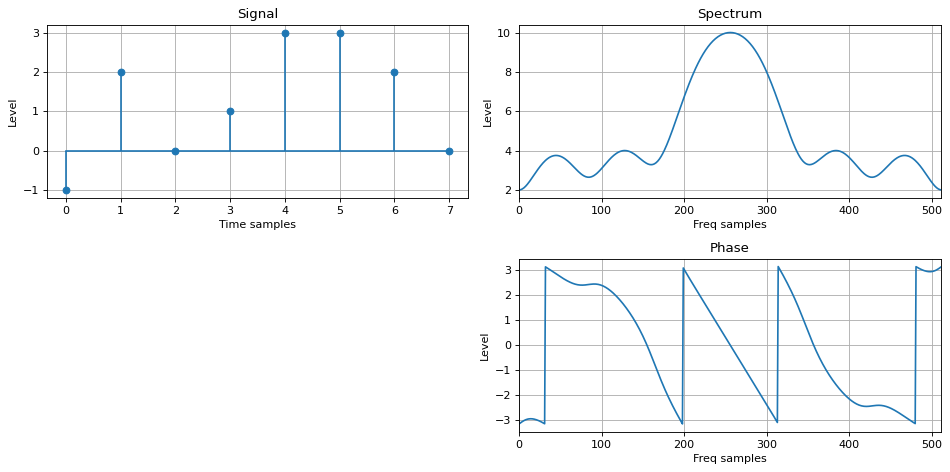

In [13]:
# signal
x = np.array([-1, 2, 0, 1, 3, 3, 2, 0])
# Z-form: X(z) = 1 + 2z^(-1)+z^(-3), where z = exp(-jwT)

# Forward FFT
N = 512
xFFT = fftshift(fft(x, N))
# Magnitude spectrum
xA = np.abs(xFFT)
# Phase spectrum
xF = np.angle(xFFT)

# List of signals
xT = [x, xA, xF]
lst_title = ['Signal', 'Spectrum', 'Phase']

# Plot results
fig = plt.figure(figsize=(12, 6), dpi=80)
for i, sig in enumerate(xT):
    plt.subplot(2, 2, int(2**i))
    plt.ylabel('Level')
    plt.title(lst_title[i])
    if i == 0:
        plt.stem(sig, use_line_collection=True, basefmt='C0')
        plt.xlabel('Time samples')
    else:
        plt.plot(sig)
        plt.xlabel('Freq samples')
        plt.xlim([0, N-1])
    plt.grid()
plt.tight_layout()

### Properties of the discrete Fourier transform

1. ** Linearity **: the sum of the signal spectra is equal to the spectrum of the sum of the signals.

This property suggests that the spectrum of the sum of independent discrete signals is equal to the sum of the spectra of these signals, and when a discrete signal is multiplied by a constant, its spectrum is also multiplied by this constant.

2. ** Offset by counts ** (by time)

The cyclic shift of the signal by m samples leads to a rotation of the phase spectrum, while the amplitude spectrum does not change.

$X'(k) = X(k) \cdot e^{- \frac{2\pi j}{N} k m} $

3. ** DFT of even and odd functions **

The DFT of an even function degenerates into the cosine Fourier transform  

$X(k) = \sum_{n=0}^{N-1}x(n)\cdot \cos{(2\pi nk/N)}$

DFT of odd function degenerates into sine Fourier transform  

$X(k) = \sum_{n=0}^{N-1}x(n)\cdot \sin{(2\pi nk/N)}$

where $k = 0, ..., N-1$.

4. ** DFT of cyclic convolution of signals **

For the signal $ x(n) $, which is the result of the cyclic convolution of two signals $ a(b) $ and $ b(n) $:  

$x(n) = \sum_{m=0}^{N-1}a(n)\cdot b(n-m)$

The N-point DFT of the sequence is:

$X(k) = A(k) \cdot B(k)$ ,  

where $ A(k), B(k) $ are signal spectra.

Thus, the spectrum of the cyclic convolution of two signals is equal to the product of the spectra of these signals. This property allows you to use fast DFT algorithms to compute convolution.

5. ** DFT product of signals **

For the signal $ x(n) $, which is the product of two signals $ a(n) $ and $ b(n) $, the spectrum is:

$X(k) = \frac{1}{N} \sum_{m=0}^{N-1}A(m)\cdot B(k-m)$

The spectrum of the product of two signals is a cyclic convolution of the spectra of these signals.

6. ** Frequency offset **

Similar to the second property (time shift), if there is a spectrum $ X(k – m) $ shifted in frequency by m, then after the IDFT the sequence $ x(n) $ takes the following form:  

$x'(n) = x(n)\cdot e^{\frac{2\pi j}{N} k m}$ 

Hence it follows that the spectrum is shifted by multiplying the signal by a complex exponent. This property is used to move frequencies across a range. Note that after multiplying by an exponent, the signal will be complex, and its spectrum will cease to be symmetric.

7. ** Parseval's theorem **

The average power of the discretized time function is equal to the sum of the powers of the individual spectral components and does not depend on their phases.

The normalized signal energy $ x(n) ^ 2 $ is:

$\sum_{n=0}^{N-1}x^{2}(n) = \frac{1}{N} \sum_{n=0}^{N-1} |{X^{2}(k)}|$  


As you can see, the properties of the DFT have the property of duality, which means that all the properties of the DFT are valid for both the signal and the spectrum.

____

### Harmonic signal spectrum

Let's show what the spectrum of a harmonic signal looks like. To do this, let us set the length of the FFT `N = 32` count. Let's see what happens when calculating the IFFT for a signal that is specified in the frequency domain as a single sample at a certain position.

Note that the forward FFT is calculated because the FFT and IFFT operations are the same and differ by a constant and a sign in turning factors.

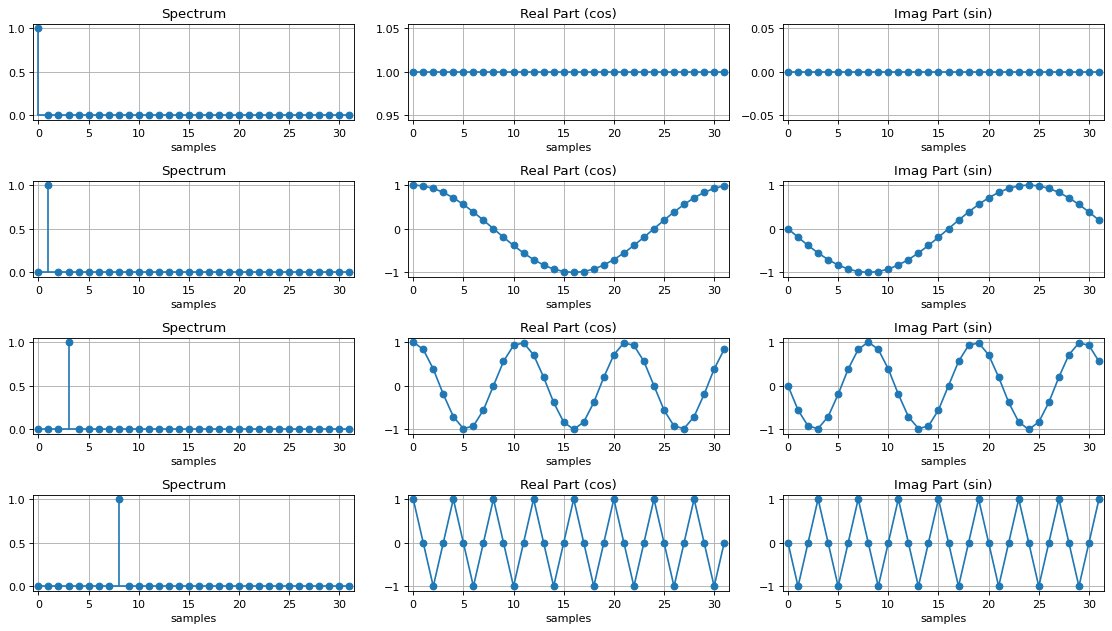

In [14]:
N, M = 32, 4

# Create freq signal
x = np.zeros((N,M))
x[0][0] = 1
x[1][1] = 1
x[3][2] = 1
x[8][3] = 1

# Calculate FFT
X = fft(x, axis=0)

# Plot results
fig = plt.figure(figsize=(14, 8), dpi=80)
for i in range(M*3):
    plt.subplot(4, 3, i+1)
    if i % 3 == 0:
        plt.title('Spectrum')
        plt.stem(x[:,i//3], use_line_collection=True, basefmt='C0')
    if (i-1) % 3 == 0:
        plt.title('Real Part (cos)')
        plt.plot(np.real(X[:,i//3]), '-o')
    if (i-2) % 3 == 0:
        plt.title('Imag Part (sin)')
        plt.plot(np.imag(X[:,i//3]), '-o')      
    plt.xlim([-0.5, N-0.5])
    plt.xlabel('samples')
    plt.grid()
plt.tight_layout()

### Spectrum of the sum of harmonic signals

Let's show how the spectrum of the sum of harmonic signals looks like (** additive law ** works: the spectrum of the sum of signals is equal to the sum of the spectra of signals).

The signal has three harmonic components.
Amplitudes of harmonics: `A1, A2, A3 = 5, 1, 3`

Harmonic frequencies: `f1, f2, f3 = 2, 7, 12`

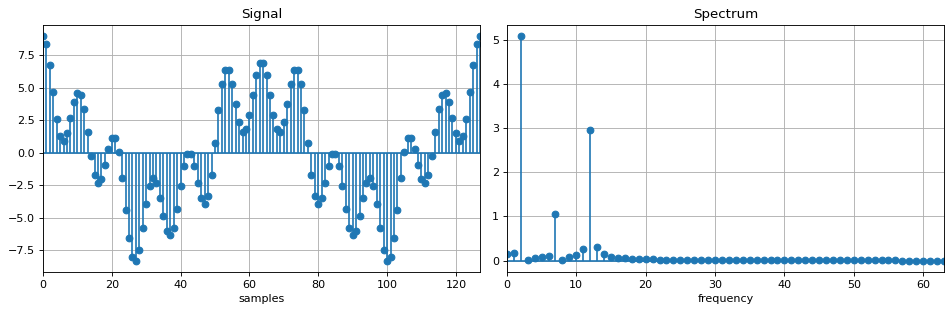

In [15]:
N = 128
# Time vector
t = np.linspace(0, 1, N)

# Amplitudes and freqs
f1, f2, f3 = 2, 7, 12
A1, A2, A3 = 5, 1, 3

# Signal
x = A1 * np.cos(2*np.pi*f1*t) + A2 * np.cos(2*np.pi*f2*t) + A3 * np.cos(2*np.pi*f3*t)

# Calculate FFT
X = fft(x)
X = 2*np.abs(X) / N

# Plot results
fig = plt.figure(figsize=(12, 4), dpi=80)
# Time: signal
plt.subplot(1, 2, 1)
plt.title('Signal')
plt.stem(x, use_line_collection=True, basefmt='C0')
plt.xlim([0, N-1])
plt.xlabel('samples')
plt.grid()

# Freq: Spectrum
plt.subplot(1, 2, 2)
plt.title('Spectrum')
plt.stem(X, use_line_collection=True, basefmt='C0')
plt.xlim([0, N//2-1])
plt.xlabel('frequency')
plt.grid()
plt.tight_layout()

### Periodic sequence

Let's see how the spectral density of the periodic sequence `x(nT)` will change if it is repeated $ M $ times after a certain number of clock cycles with a period of $ N $, where $ M $ is the number of repetitions of the discrete sequence.

As an example, take the sequence `x(nT) = {1, 1, 1}, M = 4, N = 9`.

In [16]:
N = 9    # Signal period
M = 4    # Number of repeats

# Signal
x = np.zeros(N)
x[0:3] = 1
y = np.tile(x, M)
y

array([1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0.,
       0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0.,
       0., 0.])

Max amplitude = sum of ones * M = 12.0


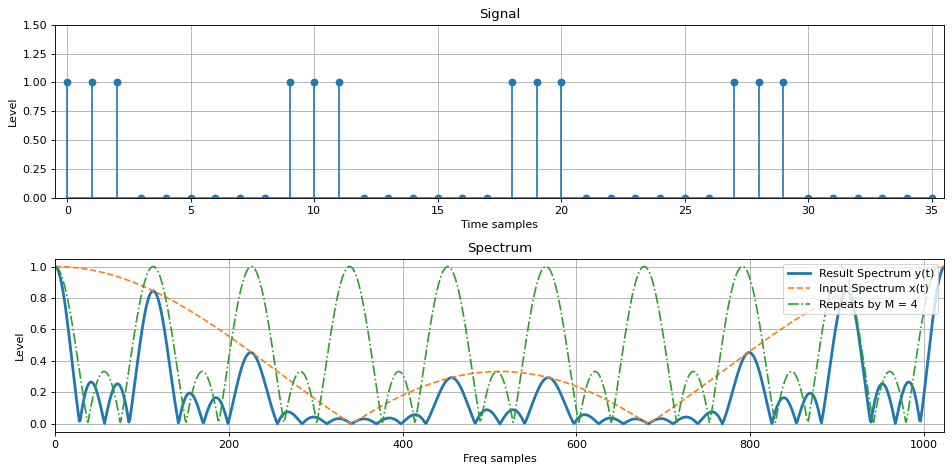

In [17]:
# Forward FFT
NFFT = 1024
xFFT = fft(y, NFFT)
# Magnitude spectrum
yA = np.abs(xFFT)
print('Max amplitude = sum of ones * M = {}'.format(yA.max()))
yA /= np.max(yA)
# Phase spectrum
yF = np.angle(xFFT)


# FFT for input signal
xFFT = fft(x, NFFT)
# Magnitude spectrum
xA = np.abs(xFFT)
xA /= np.max(xA)

# FFT for repeats
xFFT = fft(x, NFFT//N)
# Magnitude spectrum
xM = np.abs(xFFT)
xM /= np.max(xM)
xM = np.tile(xM, N)
#List of signals
xT = [y, yA]
lst_title = ['Signal', 'Spectrum', 'Phase']

# Plot results
fig = plt.figure(figsize=(12, 6), dpi=80)
for i, sig in enumerate(xT):
    plt.subplot(2, 1, int(2**i))
    plt.ylabel('Level')
    plt.title(lst_title[i])
    if i == 0:
        plt.stem(sig, use_line_collection=True, basefmt='C0')
        plt.xlabel('Time samples')
        plt.ylim([0, 1.5])
        plt.xlim([-0.5, N*M-0.5])
    else:
        
        plt.plot(sig, '-', linewidth=2.5, label='Result Spectrum y(t)')
        plt.plot(xA, '--', linewidth=1.5, label='Input Spectrum x(t)')
        plt.plot(xM, '-.', linewidth=1.5, label='Repeats by M = %d' % M)
        plt.xlabel('Freq samples')
        plt.xlim([0, NFFT-1])
        plt.legend(loc='upper right')
    plt.grid()
plt.tight_layout()

At zero frequency, the modulus of the spectrum is numerically equal to the sum of the number of samples of the non-periodic sequence `N = 3`. After multiplying the two spectra, we get the resulting spectrum of the periodic sequence. The signal level at zero frequency is equal to the sum of single pulses, and since the sequence is periodic, this can be written through the formula:

$ A_0 = \sum_ {n = 0} ^ {NM} x (nT) $

Thus, to obtain the final spectrum of a periodic sequence, the following steps must be taken: 

1. Divide the interval into N parts (signal period), 
2. Divide each part of the intervals into M parts (repetition period), 
3. Find the modulus of the spectrum of the repetition factor | M(ejωT) |, 
4. Find the spectrum of the original sequence | X(ejωT) |, 
5. Multiply the spectra | M(ejωT) | and | X(ejωT) |, obtaining the spectrum of a periodic sequence with period N and number of repetitions M. 

____

### Rotary multipliers
The DFT matrix coefficients (* twiddle factor *) or the $ W_{nk} $ rotation factors can be found using the following formula:

$ W_{k, n} = e ^ {\frac {-2 \pi j} {N} nk} $

Thus, the DFT matrix, without taking into account the normalizing factor, is structured as follows: the first row and column consist of ones, the second row contains the roots of unity of order n in natural order, the next rows are consecutive powers of the second row. Let's take a 4x4 matrix as an example.

In [18]:
N = 4
nk = np.array([i*j for i in range(N) for j in range(N)]).reshape(N, N)

# Twiddle
Wnk = np.round(np.exp(-2j*np.pi*nk/N), 3)
print(Wnk)

[[ 1.+0.j  1.+0.j  1.+0.j  1.+0.j]
 [ 1.+0.j  0.-1.j -1.-0.j -0.+1.j]
 [ 1.+0.j -1.-0.j  1.+0.j -1.-0.j]
 [ 1.+0.j -0.+1.j -1.-0.j  0.-1.j]]


Let's construct graphs of the real and imaginary parts of the matrix of turning factors for `N = 8`.

[[ 1.   +0.j     1.   +0.j     1.   +0.j     1.   +0.j     1.   +0.j
   1.   +0.j     1.   +0.j     1.   +0.j   ]
 [ 1.   +0.j     0.707-0.707j  0.   -1.j    -0.707-0.707j -1.   -0.j
  -0.707+0.707j -0.   +1.j     0.707+0.707j]
 [ 1.   +0.j     0.   -1.j    -1.   -0.j    -0.   +1.j     1.   +0.j
   0.   -1.j    -1.   -0.j    -0.   +1.j   ]
 [ 1.   +0.j    -0.707-0.707j -0.   +1.j     0.707-0.707j -1.   -0.j
   0.707+0.707j  0.   -1.j    -0.707+0.707j]
 [ 1.   +0.j    -1.   -0.j     1.   +0.j    -1.   -0.j     1.   +0.j
  -1.   -0.j     1.   +0.j    -1.   -0.j   ]
 [ 1.   +0.j    -0.707+0.707j  0.   -1.j     0.707+0.707j -1.   -0.j
   0.707-0.707j -0.   +1.j    -0.707-0.707j]
 [ 1.   +0.j    -0.   +1.j    -1.   -0.j     0.   -1.j     1.   +0.j
  -0.   +1.j    -1.   -0.j    -0.   -1.j   ]
 [ 1.   +0.j     0.707+0.707j -0.   +1.j    -0.707+0.707j -1.   -0.j
  -0.707-0.707j -0.   -1.j     0.707-0.707j]]


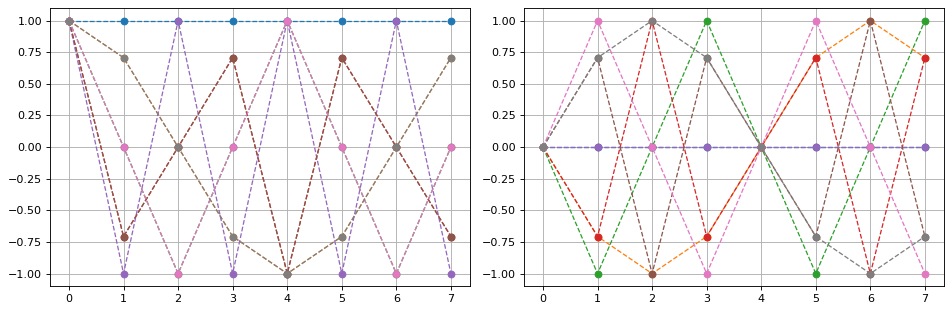

In [19]:
N = 8
nk = np.array([i*j for i in range(N) for j in range(N)]).reshape(N, N)

# Twiddle
Wnk = np.round(np.exp(-2j*np.pi*nk/N), 3)
print(Wnk)

fig = plt.figure(figsize=(12, 4), dpi=80)

plt.subplot(1, 2, 1)
for i in range(N):
    plt.plot(np.real(Wnk[i,:]), '--o', linewidth=1.15)
plt.grid(True)
plt.subplot(1, 2, 2)
for i in range(N):
    plt.plot(np.imag(Wnk[i,:]), '--o', linewidth=1.15)
plt.grid(True)
plt.tight_layout()

Let's build the graphs of the * real part * of the matrix of turning factors for `N = 16`.

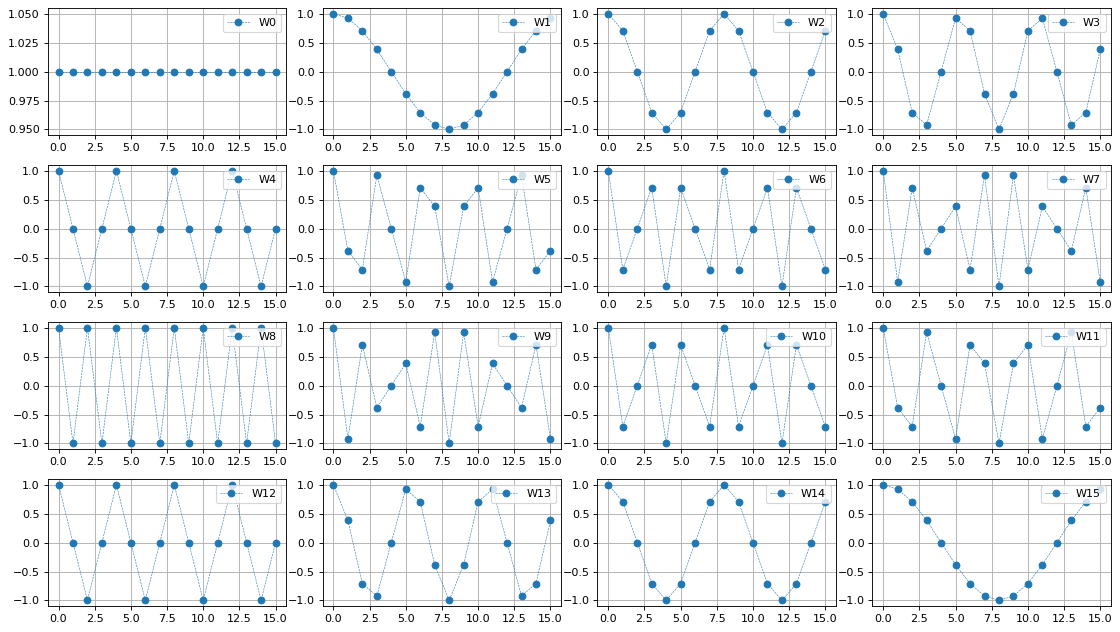

In [20]:
N = 16
nk = np.array([i*j for i in range(N) for j in range(N)]).reshape(N, N)

# Twiddle
Wnk = np.round(np.exp(-2j*np.pi*nk/N), 5)

fig = plt.figure(figsize=(14, 8), dpi=80)
for i in range(N):
    plt.subplot(N//4, 4, i+1)
    plt.plot(np.real(Wnk[i,:]), '--o', linewidth=0.5, label='W{}'.format(i))
    plt.grid(True)
    plt.legend(loc='upper right')
plt.tight_layout()

### Going from DFT to FFT

The Fourier transform underlies the methods of convolution and design of digital correlators, is actively used in spectral analysis, and is used when working with long numbers. However, before the advent of computers, the DFT was rarely used, since calculating the DFT even for 64 samples requires 4096 complex multiplication operations and almost the same number of addition operations, which is quite long and laborious to manually calculate. For N = 1024, about a million complex multiplications and a million complex multiplications are required. The more calculation points (the longer the DFT length), the more time is spent on calculations due to the increase in the number of operations.

Calculating the Fourier transform using the standard formula involves performing * a large number of addition and multiplication operations *. Obviously, it becomes necessary to develop algorithms that reduce the number of mathematical operations when calculating the DFT.

It should be noted that it is not necessary to calculate the DFT directly and you can get by with a significantly smaller number of operations. Consider the main idea of ​​the FFT, which consists in splitting the original N – dimensional sequence $ x(n), n = 0, ..., N – 1 $ into parts. In this case, for each part, you can calculate the DFT separately, and then linearly sum with the rest to get the original transformation. In turn, these smaller pieces can be broken down into even smaller pieces and the same operations performed.

Let the length of the periodic sequence be equal to $ N $, then to calculate one spectral sample, $ N $ complex multiplication and addition operations are required. Thus, the total computational complexity of the DFT algorithm is $ N ^ 2 $ multiplications and additions. If we divide the original sequence into two equal parts of $ N / 2 $ elements, then to perform the calculation of the transformation according to the classical formula, at each stage it will take ** two times less ** operations of addition and multiplication.

Moreover, each of the N / 2-point DFTs can also be calculated by replacing the $ N / 2 $ -point DFT with two $ N / 4 $ -point DFTs. In this case, the number of complex addition and multiplication operations is halved. The essence of this DFT algorithm is that you can continue splitting the original sequence as long as the sequence can be divided by two. It is clear that if the length of the input sequence is $ N = 2m $, where $ m $ is a positive integer, then the original sequence can be halved only m times. FFT algorithms, with sequence length $ N = 2m $, are called ** Radix-2 FFT algorithms.

The efficiency of the FFT algorithm depends entirely on how the sequence is split and merged. Obviously, the sequences can be divided into two parts in different ways, but it depends on whether we can obtain an undistorted signal spectrum when combining and what it will cost us in terms of computational costs and resource use. The number of FFT operations linearly depends on the length of the $ N $ sequence. 


### Efficiency comparison

Below is a table showing a comparison of the performance of FFT algorithms versus DFT. The efficiency of the FFT algorithm and the number of operations performed linearly depend on the sequence length N

<table>
    <thead>
        <tr>
            <th colspan = 2> DFT </th>
            <th colspan = 2> FFT </th>
            <th rowspan = 2> Complex addition ratio </th>
            <th rowspan = 2> Complex multiplication ratio </th>
        </tr>
        <tr>
            <th> Number of multiplication operations </th>
            <th> Number of addition operations </th>
            <th> Number of multiplication operations </th>
            <th> Number of addition operations </th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td>2</td>
            <td>4</td>
            <td>2</td>
            <td>1</td>
            <td>2</td>
            <td>4</td>
            <td>1</td>
        </tr>
        <tr>
            <td>4</td>
            <td>16</td>
            <td>12</td>
            <td>4</td>
            <td>8</td>
            <td>4</td>
            <td>1.5</td>
        </tr>
        <tr>
            <td>8</td>
            <td>64</td>
            <td>56</td>
            <td>12</td>
            <td>24</td>
            <td>5.3</td>
            <td>2.3</td>
        </tr>
        <tr>
            <td>16</td>
            <td>256</td>
            <td>240</td>
            <td>32</td>
            <td>64</td>
            <td>8</td>
            <td>3.75</td>
        </tr>
        <tr>
            <td>32</td>
            <td>1024</td>
            <td>992</td>
            <td>80</td>
            <td>160</td>
            <td>12.8</td>
            <td>6.2</td>
        </tr>
        <tr>
            <td>64</td>
            <td>4096</td>
            <td>4032</td>
            <td>192</td>
            <td>384</td>
            <td>21.3</td>
            <td>10.5</td>
        </tr>
        <tr>
            <td>128</td>
            <td>16384</td>
            <td>16256</td>
            <td>448</td>
            <td>896</td>
            <td>36.6</td>
            <td>18.1</td>
        </tr>
        <tr>
            <td>...</td>
            <td>...</td>
            <td>...</td>
            <td>...</td>
            <td>...</td>
            <td>...</td>
            <td>...</td>
        </tr>
        <tr>
            <td>4096</td>
            <td>16777216</td>
            <td>16773120</td>
            <td>24576</td>
            <td>49152</td>
            <td>683</td>
            <td>341</td>
        </tr> 
        <tr>
            <td>8192</td>
            <td>67108864</td>
            <td>67100672</td>
            <td>53248</td>
            <td>106496</td>
            <td>1260</td>
            <td>630</td>
        </tr>
    </tbody>
</table>

The table shows that the use of FFT significantly saves on the number of operations, and the larger the sequence length N, the greater the savings.

For example, for $ N = 8192 $ samples, calculating the DFT requires 67 million complex addition and multiplication operations! Using FFT algorithms, you can reduce these numbers by $ ~ 1260 $ and $ ~ 630 $ times, respectively !!

### FFT Algorithms

There are two main methods for calculating FFT in base 2 (Radix-2): decimation (or decimation) by ** frequency ** and by ** time **. Let's consider both options.

Consider the first method for dividing a sequence - decimation in time, which is also called the FFT algorithm with "decimation in time" ** FFT Decimation-in-time [DIT] **. The idea is that the original sequence of samples $ x (n) $ with length N is split into two sequences $ x0 (n) $ and $ x1 (n) $ of equal length $ N / 2 $.

Moreover, $ x0(n) $ is a sequence of even samples -  

$x0(n) = x(2n), n = 0, ..., N/2 - 1$  

and $x1(n) $ is a sequence of odd samples -

$x1(n) = x(2n+1), n = 0, ..., N/2 - 1$

Bypassing the mathematical calculations (they can be found in any literature on digital signal processing), we write down the basic rules for calculating the FFT by dividing the sequence into even and odd ones.

** FFT algorithm with decimation in time **:
- to carry out a binary-inverse permutation of the input signal samples, ensuring the partition of the original sequence;
- do N / 2 operations "Butterfly" to obtain the first union using the rotational factors;
- repeat the "Butterfly" operation to go to the next stages, also using the rotary factors.

After all the above actions, we get the DFT of the input sequence at the output.

"Butterfly" is a directed graph, with the help of which a pair of complex samples is calculated based on the previous values. For a time decimation FFT, the base 2 butterfly is written as:

$ X = A + B\cdot W^{-k}_{N}$ 

$ Y = A - B\cdot W^{-k}_{N}$ 

In the FFT algorithm with time decimation, the original signal was divided in accordance with the binary-inverse permutation - into even and odd parts. This gives us the first and second half of the spectrum. In the algorithm with decimation in frequency, on the contrary, the original signal is divided in half, and the output is two sequences of spectral samples - even and odd (that's why the algorithm is called "decimation by frequency").

The sequence of samples $ x(n) $ with length N is split into two sequences $ x0(n) $ and $ x1(n) $ of equal length $ N / 2 $.

Moreover, $ x0(n) $ is the sequence of the first half of the data - 

$x0(n) = x(n), n = 0, ..., N/2 - 1$  

and $ x1(n) $ is the sequence of the second half of the data -  

$x1(n) = x(n), n = N/2, ..., N - 1$

The fundamental difference between the algorithms is that when decimating in time, multiplication by the rotary coefficients was performed after the DFT of an even and odd sequence, and when decimation in frequency is used, multiplication is performed before the DFT.

Moreover, the computational efficiency and speed of both algorithms are identical.

** Frequency decimation FFT algorithm **:
- do N / 2 operations "Butterfly" to obtain the first union using the rotational factors;
- repeat the "Butterfly" operation to go to the next stages, also using the rotary factors.
- to carry out a binary-inverse permutation of the resulting signal;

In this case, the butterfly looks somewhat different:

$ X = A + B$ 

$ Y = (A - B)\cdot W^{-k}_{N}$ 

____

### Python FFT library

The scipy Python library for calculating various Fourier transforms (sine, cosine, direct, inverse, multidimensional, real) contains the package of the same name ** fftpack **. To import a package into a project, run the command:

```python
from scipy.fftpack import *
# or
from scipy.fftpack import fft, ifft, fftshift
```

### List of functions from the fftpack package:

** Fast Fourier Transform **

| ** Function ** | ** Description ** |
| --- | --- |
| `fft(x [, n, axis, overwrite_x])` | Direct FFT |
| `ifft(x [, n, axis, overwrite_x])` | Inverse FFT |
| `fft2(x [, shape, axes, overwrite_x])` | 2D Direct FFT |
| `ifft2(x [, shape, axes, overwrite_x])` | 2D Inverse FFT |
| `fft2(x [, shape, axes, overwrite_x])` | Multidimensional Direct FFT |
| `ifft2(x [, shape, axes, overwrite_x])` | Multidimensional Inverse FFT |
| `rfft(x [, n, axis, overwrite_x])` | Direct FFT of Real Signal |
| `irfft(x [, n, axis, overwrite_x])` | Inverse FFT of Real Signal |
| `dct(x [, type, n, axis, norm, overwrite_x])` | Direct cosine PF |
| `idct(x [, type, n, axis, norm, overwrite_x])` | Inverse cosine PF |
| `dctn(x [, type, shape, axes, norm, overwrite_x])` | Multidimensional forward cosine PF |
| `idctn(x [, type, shape, axes, norm, overwrite_x])` | Multidimensional Inverse Cosine FFT |
| `dst(x [, type, n, axis, norm, overwrite_x])` | Direct sine PF |
| `idst(x [, type, n, axis, norm, overwrite_x])` | Inverse sine PF |
| `dstn(x [, type, shape, axes, norm, overwrite_x])` | Multidimensional forward sine PF |
| `idstn(x [, type, shape, axes, norm, overwrite_x])` | Multivariate Inverse Sine FFT |

** Differential and pseudo-differential operators **

- apply to periodic sequences.

| ** Function ** | ** Description ** |
| --- | --- |
| `diff(x [, order, period, _cache])` | k-derivative (or integral) |
| `tilbert(x, h [, period, _cache])` | h-Tilbert transformation |
| `itilbert(x, h [, period, _cache])` | Inverse h-Tilbert transform |
| `hilbert(x [, _cache])` | Hilbert Transform |
| `ihilbert(x)` | Inverse Hilbert Transform |
| `cs_diff(x, a, b [, period, _cache])` | (a, b) -cosh / sinh pseudo-derivative |
| `sc_diff(x, a, b [, period, _cache])` | (a, b) -sinh / cosh pseudo-derivative |
| `ss_diff(x, a, b [, period, _cache])` | (a, b) -sinh / sinh pseudo-derivative |
| `cc_diff(x, a, b [, period, _cache])` | (a, b) -cosh / cosh pseudo-derivative |
| `shift(x, a [, period, _cache])` | Shift of the sequence y (u) = x (u + a) |

**Secondary functions**

| ** Function ** | ** Description ** |
| --- | --- |
| `fftshift(x [, axes])` | Symmetric Shift of FFT Zero to the Center |
| `ifftshift(x [, axes])` | Reverse symmetric shift |
| `fftfreq(n [, d])` | Returns the frequencies of the Fourier transform |
| `rfftfreq(n [, d])` | Returns the DFT frequencies |
| `next_fast_len(target)` | Finding the nearest number 2 ^ k for calculating the FFT |


** Signal convolution **

The FFT can be used to calculate the convolution of long sequences. This method is used in conditions of limited computing resources (for example, in devices of programmable logic integrated circuits - FPGAs). In the following sections, the task of folding sequences will be discussed in detail.
____

### Freeform signals

Any arbitrary waveform can be represented as a set of harmonic signals of different frequencies. In other words, a complex waveform in the time domain has a set of complex samples in the frequency domain called * harmonics *. These readings express the amplitude and phase of the harmonic impact at a specific frequency. The larger the set of harmonics in the frequency domain, the more accurately the complex waveform appears.

For example, there is a square wave signal. It is required to represent it as a sum of harmonic signals. The following example shows how the number of frequency complex samples affects the waveform in the time domain.

- Create a square wave signal,
- We calculate the FFT of this signal,
- We set an array of frequencies from which the original signal is restored,
- Displaying the result.

Let's create a square wave with unit amplitude and calculate its FFT. Length N = 1024 counts. The signal accepts zero values ​​at all points except the range `[64: 256]`.
Let's show what the waveform looks like in the time domain, if it is collected from the sum of harmonics. For clarity, we present graphs for different values ​​of the set of sums - `3, 10, 30, 90, 200, N / 2`. Obviously, it will not work to recreate the exact shape of a rectangular pulse from three harmonics. At a value of 10, the waveform begins to tend to rectangular. At values ​​of 30 and 90, distortions are still visible, in particular at the boundaries of a sharp break in the function. At N / 2, the signal has its original shape (recreated from a sufficient set of harmonics for a square wave).

This means that sharp changes in the signal in the time domain contribute to the higher (high) frequencies of the signal spectrum, and smooth changes in the signal contribute to the lower (low) frequencies of the signal spectrum.

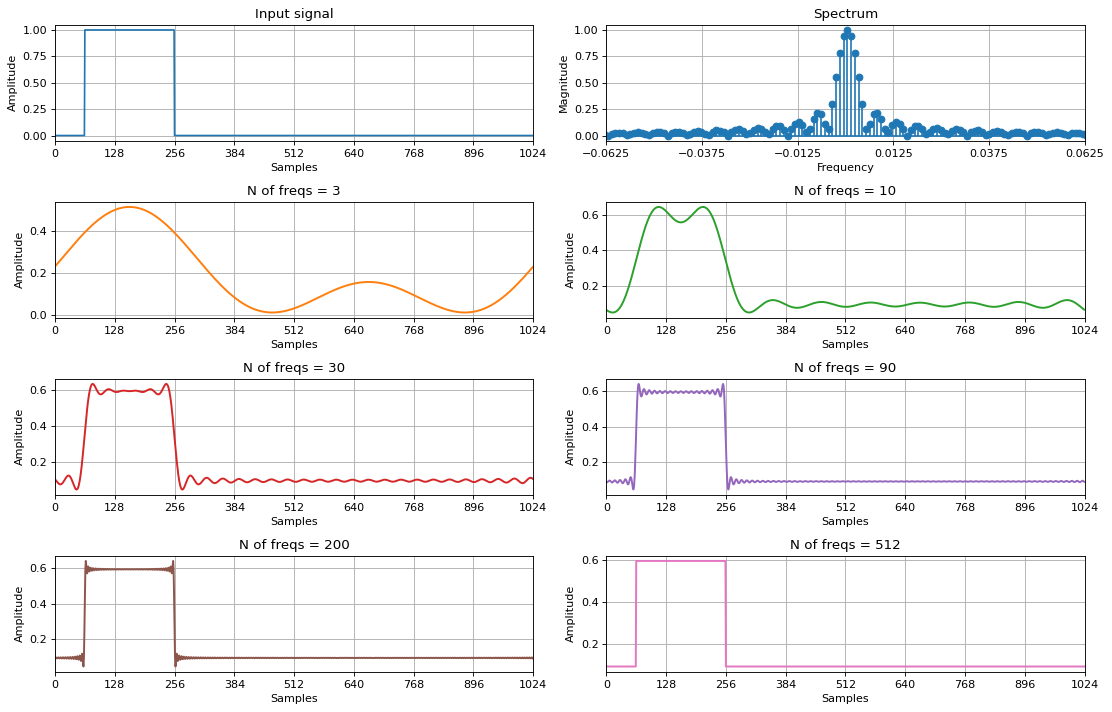

In [21]:
N = 1024
# Create input signal 
x = np.zeros(N)
x[64:256] = 1

# Find Forward FFT
X = fft(x, N)
# Normalized shifted spectrum
Xs = fftshift(np.abs(X))
Xs /= np.max(Xs)
# Normalized frequency
f = np.linspace(-0.5, 0.5, N, endpoint=True)

# Plot input signal in time domain
plt.figure(figsize=(14, 9), dpi=80)
plt.subplot(4, 2, 1)
plt.plot(x)
plt.title('Input signal')
plt.xlabel('Samples')
plt.ylabel('Amplitude')
plt.xlim([0, N-1])
plt.xticks(np.linspace(0, N, 9, endpoint=True))
plt.grid()

# Plot signal in freq domain
plt.subplot(4, 2, 2)
plt.stem(f, Xs, use_line_collection=True, basefmt='C0')
plt.title('Spectrum')
plt.xlabel('Frequency')
plt.ylabel('Magnitude')
plt.xlim([-1/16, 1/16])
plt.xticks(np.linspace(-1/16, 1/16, 6, endpoint=True))
plt.grid()

# Set the list - number of harmonics
l_freqs = (3, 10, 30, 90, 200, N//2)

# Plot signal with several
for i, j in enumerate(l_freqs):
    plt.subplot(4, 2, i+3)
    K = X.copy()
    K[j:] = 0
    k = np.real(ifft(K))
    plt.plot(k, color='C'+str(i+1), linewidth=1.75)
    plt.title(f'N of freqs = {j}')
    plt.xlabel('Samples')
    plt.ylabel('Amplitude')
    plt.xlim([0, N-1])
    plt.xticks(np.linspace(0, N, 9, endpoint=True))
    plt.grid()
plt.tight_layout()
#plt.savefig("fig1_gibbs.png")

### Gibbs effect

Inserted pulsations in the area of ​​sharp signal drops are associated with the ** Gibbs effect **. This effect is associated with a consistent approach to the original form in the form of partial sums of the Fourier series. In other words, the nature of the pulsations in the reconstructed signal is directly related to the Gibbs effect. The Gibbs effect is pronounced in case of sharp violations of the monotonicity of the function. At sharp drops and jumps, this effect is maximum.

The figure below shows a graph of the reconstruction of a linear signal using the partial sum of the Fourier series at different values ​​of the number of total samples.

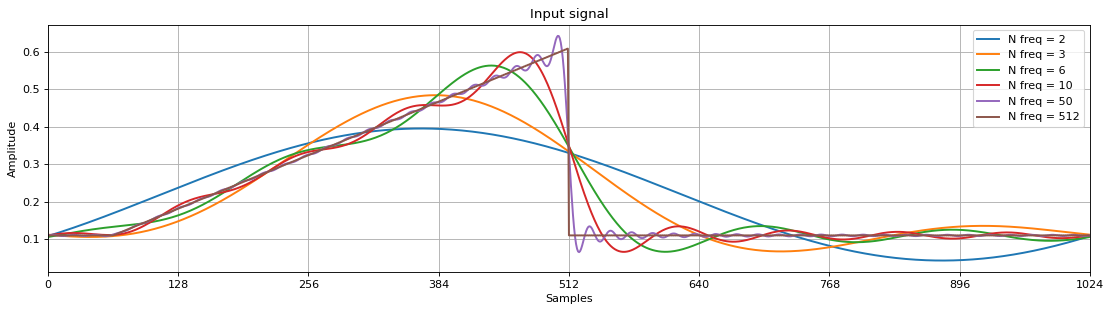

In [22]:
N = 1024
# Create input signal 
x = np.zeros(N)
x[64:512] = np.linspace(0, 1, 512-64)

# Find Forward FFT
X = fft(x, N)

# Set the list - number of harmonics
l_freqs = (2, 3, 6, 10, 50, N//2)

# Plot signal with several
plt.figure(figsize=(14, 4), dpi=80)
plt.title('Input signal')
plt.xlabel('Samples')
plt.ylabel('Amplitude')
plt.xlim([0, N-1])
plt.xticks(np.linspace(0, N, 9, endpoint=True))
for i, j in enumerate(l_freqs): 
    K = X.copy()
    K[j:] = 0
    k = np.real(ifft(K))
    plt.plot(k, color='C'+str(i), linewidth=1.75, label='N freq = {}'.format(l_freqs[i]))
plt.grid()
plt.legend()
plt.tight_layout()
#plt.savefig("fig2_gibbs.png")